In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to check my results
from scipy import stats
from sklearn.neighbors import KernelDensity

## mykde(X, h)

In [6]:
def kernel(dist):
    """
    uniform kernel function
    """
    return int(dist <= .5)

def mykde(x, h, auto=True):
    """
    x - data np.array with shape (n, 2)
    h - bandwidth, int
    auto - bool on how to generate # of bins
    
    return [p(estimated density p(x)), x(domain where p(x) was estimated)]
    """
    
    xmin, xmax = np.min(x), np.max(x)
    diff = xmax - xmin
        
    bins = np.linspace(xmin-h, xmax+h, int(diff/h) + 50 if auto else 100)
    
    # p(x)
    sums = np.zeros(len(bins))
        
    # compute density 
    for xi in x:
        # in every bin
        for i, bi in enumerate(bins):
            # compute distance
            dist = abs(bi-xi)/h
            sums[i] += kernel(dist)/h
        
    # normalize px
    sums /= len(x)
        
    return sums, bins

## generating data to test mykde

(0, 10)

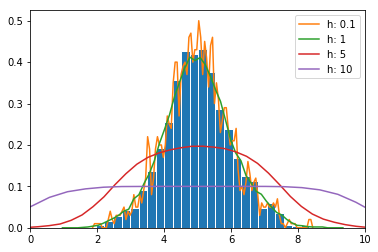

In [7]:
x1 = np.random.normal(5, 1, 1000)

# underlying histogram
_ = plt.hist(x1[:], bins=25, density=True, ec='white')

# for different bandwidth
for h in [.1, 1, 5, 10]:
    px, bins = mykde(x1, h)
    
    plt.plot(bins, px, label=f'h: {h}')

plt.legend()
plt.xlim((0, 10))

## generate data & test mykde with (mu, sigma) = (5, 1) & (0, 0.2)

(-2, 2)

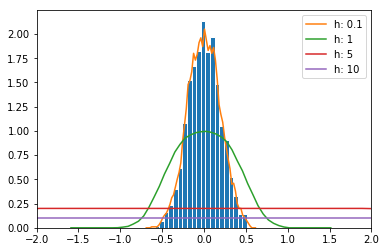

In [8]:
x2 = np.random.normal(0, 0.2, 1000)

# underlying histogram
_ = plt.hist(x2[:], bins=20, density=True, ec='white')

# for different bandwidth
for h in [.1, 1, 5, 10]:
    px, bins = mykde(x2, h)
    
    plt.plot(bins, px, label=f'h: {h}')

plt.legend()
plt.xlim((-2, 2))